### Realism Trajectories

In [34]:
from utils.plotter import get_roc_curves_from_df
from utils.wandb_calls import fetch_files_from_runs
import os
import pandas as pd
import pickle
import shutil

In [35]:
from utils.get_circuit_discovery_scores import get_realism_scores
same_size = True
acdc_realism = get_realism_scores(weight="", algorithm="acdc", same_size=same_size)
# acdc_tracr_realism = get_realism_scores(weight="tracr", algorithm="acdc", same_size=False)

# append acdc_tracr_realism to acdc_realism
# acdc_realism = acdc_realism.append(acdc_tracr_realism)

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [36]:
len(acdc_realism["run"].unique())

11

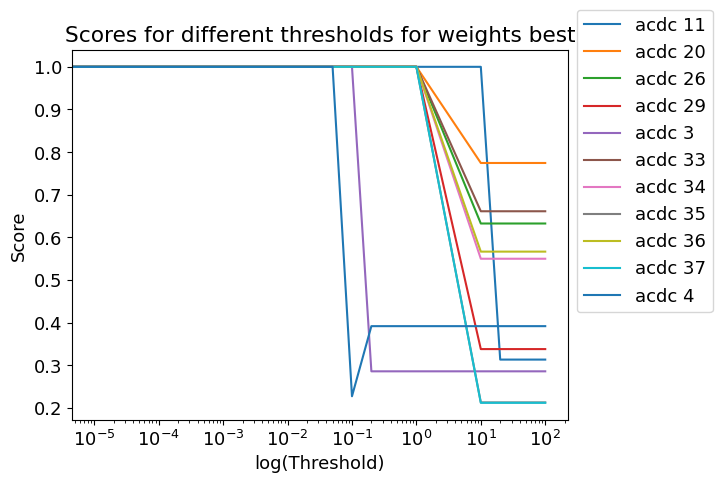

In [37]:
import matplotlib.pyplot as plt
import numpy as np
def plot_scores_for_weights(df, weights, algorithm = "acdc"):
    if algorithm == "acdc":
        sort_key = "threshold"
        ascending = False
    elif "sp" in algorithm:
        sort_key = "lambda"
        ascending = True
    if weights != "best":
        filtered_df = df[df["weights"] == weights]
    else:
        # keep everything other than weights == tracr or 100
        filtered_df = df[~df["weights"].isin(["tracr", "100"])]

    for run, group in filtered_df.groupby("run"):
        # print(run)
        group = group.sort_values(by=sort_key, ascending=ascending)
        plt.plot(group[sort_key],
                group["score"], 
                label=f"{algorithm} {run}")
        # plot in log scale
        plt.xscale("log")

    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))

    plt.xlabel("log(Threshold)")
    plt.ylabel("Score")
    plt.title(f"Scores for different thresholds for weights {weights}")
    plt.show()

plot_scores_for_weights(acdc_realism, "best")

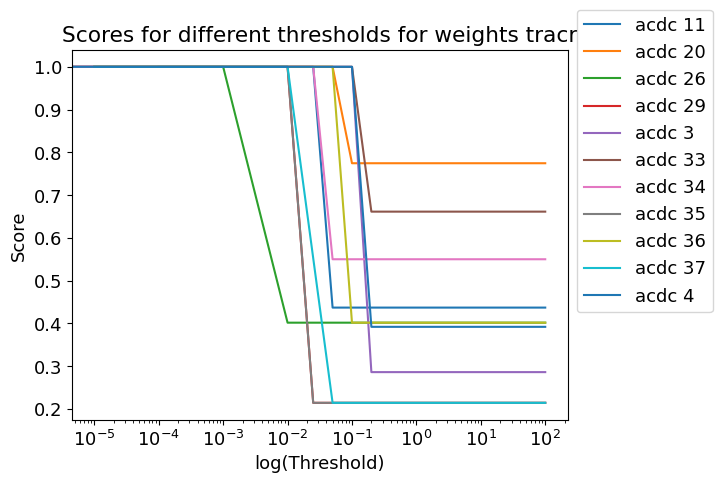

In [38]:
plot_scores_for_weights(acdc_realism, "tracr")

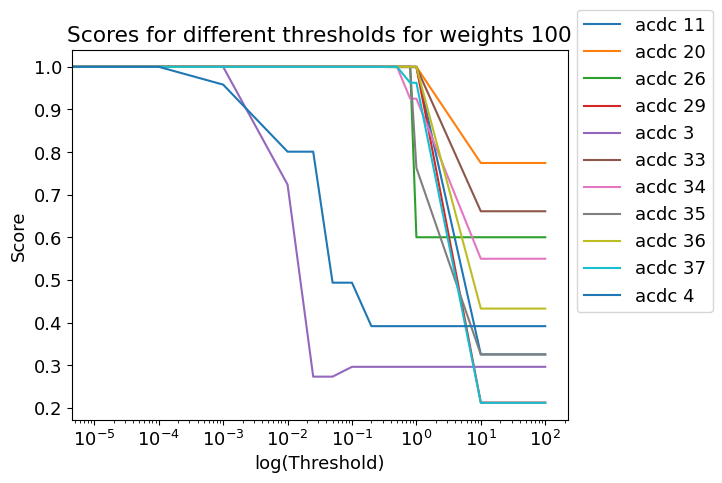

In [39]:
plot_scores_for_weights(acdc_realism, "100")

In [40]:
acdc_realism["run"].unique()

array(['4', '11', '20', '34', '35', '33', '29', '37', '36', '26', '3'],
      dtype=object)

Text(0, 0.5, 'Circuit Accuracy')

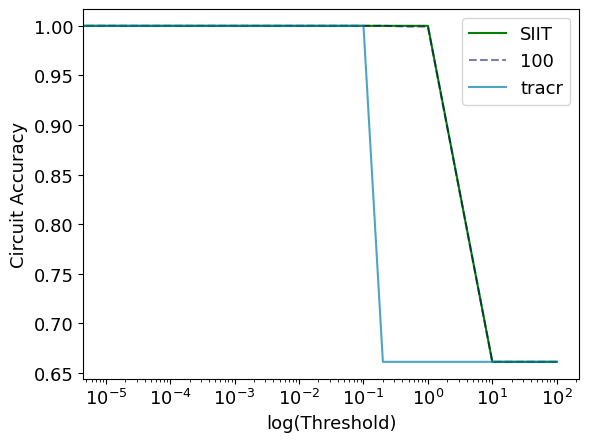

In [41]:
run = "33"

acdc_run = acdc_realism[acdc_realism["run"] == run]


c100 = acdc_run[acdc_run["weights"] == "100"].sort_values(by="threshold", ascending=False)
tracr = acdc_run[acdc_run["weights"] == "tracr"].sort_values(by="threshold", ascending=False)
# all items other than tracr and 100
c510 = acdc_run[~acdc_run["weights"].isin(["tracr", "100"])].sort_values(by="threshold", ascending=False)
assert len(c510) > 0 and len(c100) > 0 and len(tracr) > 0


# set color scheme
cmap = plt.get_cmap('ocean')
colors = cmap(np.linspace(0, 1, 4))
plt.plot(c510["threshold"], c510["score"], label="SIIT", color=colors[0], alpha=1)
plt.plot(c100["threshold"], c100["score"], label="100", color=colors[1], alpha=0.5, linestyle="--")
plt.plot(tracr["threshold"], tracr["score"], label="tracr", color=colors[2], alpha=0.7)
plt.legend()
plt.xscale("log")
plt.xlabel("log(Threshold)")
plt.ylabel("Circuit Accuracy")


Text(0, 0.5, 'Circuit Accuracy')

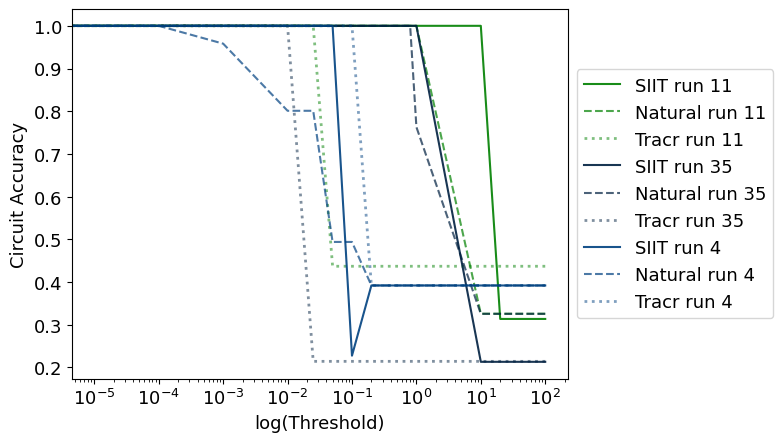

In [42]:
runs = [ "11", "35", "4"]
# set color scheme
cmap_510 = plt.get_cmap('ocean')
cmap_100 = plt.get_cmap('ocean')
cmap_tracr = plt.get_cmap('ocean')
colors_510 = cmap_510(np.linspace(0, 1, len(runs)+2))
colors_100 = cmap_100(np.linspace(0, 1, len(runs)+2))
colors_tracr = cmap_tracr(np.linspace(0, 1, len(runs)+2))
for i, run in enumerate(runs):
    acdc_run = acdc_realism[acdc_realism["run"] == run]

    c100 = acdc_run[acdc_run["weights"] == "100"].sort_values(by="threshold", ascending=False)
    tracr = acdc_run[acdc_run["weights"] == "tracr"].sort_values(by="threshold", ascending=False)
    # all items other than tracr and 100
    c510 = acdc_run[~acdc_run["weights"].isin(["tracr", "100"])].sort_values(by="threshold", ascending=False)

    if not (len(c510) > 0 and len(c100) > 0 and len(tracr) > 0) :
        continue

    plt.plot(c510["threshold"], c510["score"], label="SIIT run " + run, 
             color=colors_510[i], alpha=0.9)
    plt.plot(c100["threshold"], c100["score"], label="Natural run " + run,
             color=colors_100[i], alpha=0.7, linestyle="--")
    plt.plot(tracr["threshold"], tracr["score"], label="Tracr run " + run, 
             color=colors_tracr[i], alpha=0.5, linestyle=":", linewidth=2)
# make sure the legend is outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xscale("log")
plt.xscale("log")
plt.xlabel("log(Threshold)")
plt.ylabel("Circuit Accuracy")

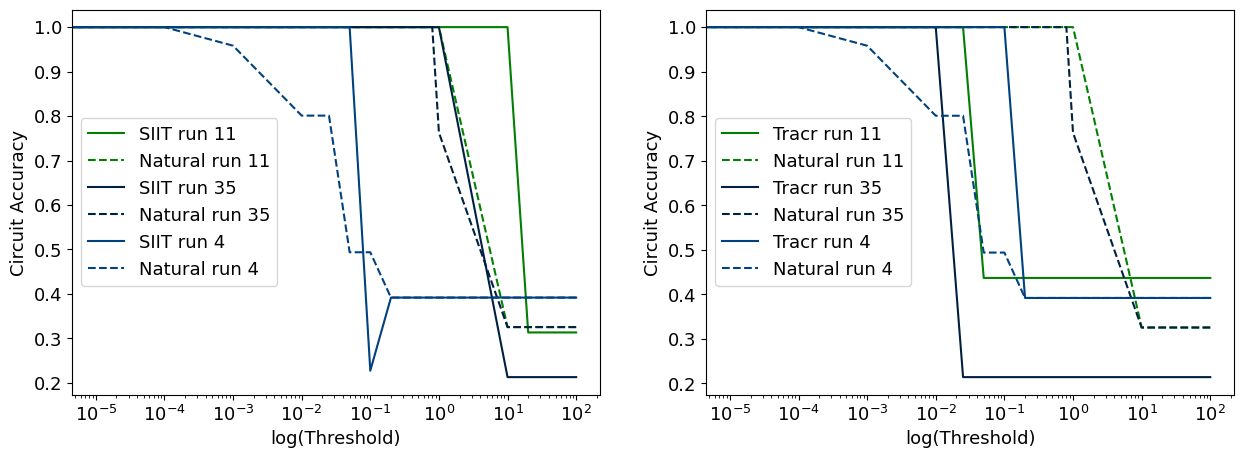

In [43]:
runs = [ "11", "35", "4"]

# make 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# set color scheme
scheme = "ocean"
cmap_510 = plt.get_cmap(scheme)
cmap_100 = plt.get_cmap(scheme)
cmap_tracr = plt.get_cmap(scheme)
colors_510 = cmap_510(np.linspace(0, 1, len(runs)+2))
colors_100 = cmap_100(np.linspace(0, 1, len(runs)+2))
colors_tracr = cmap_tracr(np.linspace(0, 1, len(runs)+2))
for i, run in enumerate(runs):
    acdc_run = acdc_realism[acdc_realism["run"] == run]

    c100 = acdc_run[acdc_run["weights"] == "100"].sort_values(by="threshold", ascending=False)
    tracr = acdc_run[acdc_run["weights"] == "tracr"].sort_values(by="threshold", ascending=False)
    # all items other than tracr and 100
    c510 = acdc_run[~acdc_run["weights"].isin(["tracr", "100"])].sort_values(by="threshold", ascending=False)

    if not (len(c510) > 0 and len(c100) > 0 and len(tracr) > 0) :
        continue
    ax[0].plot(c510["threshold"], c510["score"], label="SIIT run " + run,
                color=colors_510[i], alpha=1)
    ax[0].plot(c100["threshold"], c100["score"], label="Natural run " + run,
                color=colors_100[i], alpha=1, linestyle="--")
    
    ax[1].plot(tracr["threshold"], tracr["score"], label="Tracr run " + run,
                color=colors_tracr[i], alpha=1)
    ax[1].plot(c100["threshold"], c100["score"], label="Natural run " + run,
             color=colors_100[i], alpha=1, linestyle="--")
# make sure the legend is outside the plot
ax[0].legend(loc='center left', )
ax[1].legend(loc='center left', )
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("log(Threshold)")
ax[1].set_xlabel("log(Threshold)")
ax[0].set_ylabel("Circuit Accuracy")
ax[1].set_ylabel("Circuit Accuracy")
plt.savefig("plots/realism_trajectories.pdf", bbox_inches='tight', dpi=600)

In [44]:
from utils.get_circuit_discovery_scores import walk_dirs_and_get_scores
from utils.plotter import pessimistic_auc

In [45]:
unique_runs = acdc_realism["run"].unique()
siit_nat_cross_correlation = []
tracr_nat_cross_correlation = []
runs_in_common = []
for run in unique_runs:
    acdc_run = acdc_realism[acdc_realism["run"] == run]

    nat_score = acdc_run[acdc_run["weights"] == "100"].sort_values(by="threshold", ascending=False)
    tracr_score = acdc_run[acdc_run["weights"] == "tracr"].sort_values(by="threshold", ascending=False)
    # all items other than tracr and 100
    siit_score = acdc_run[~acdc_run["weights"].isin(["tracr", "100"])].sort_values(by="threshold", ascending=False)
    
    if not (len(siit_score) > 0 and len(nat_score) > 0 and len(tracr_score) > 0):
        print(f"run {run} does not have all the weights")
        continue
    
    common_thresholds = set(siit_score["threshold"].values).intersection(set(tracr_score["threshold"].values)).intersection(set(nat_score["threshold"].values))
    common_thresholds = sorted(list(common_thresholds))
    if common_thresholds == []:
        print(f"run {run} does not have common thresholds")
        continue
    siit_scores = []
    tracr_scores = []
    nat_scores = []
    for t in common_thresholds:
        siit_scores.append(siit_score[siit_score["threshold"] == t]["score"].values[0])
        tracr_scores.append(tracr_score[tracr_score["threshold"] == t]["score"].values[0])
        nat_scores.append(nat_score[nat_score["threshold"] == t]["score"].values[0])
    
    siit_nat_cross_correlation.append(np.corrcoef(siit_scores, nat_scores)[0,1])
    tracr_nat_cross_correlation.append(np.corrcoef(tracr_scores, nat_scores)[0,1])
    runs_in_common.append(run)
      
# make a table of the correlation coefficients
cc_vals = pd.DataFrame({"run": runs_in_common, "siit v/s nat": siit_nat_cross_correlation, "tracr v/s nat": tracr_nat_cross_correlation})

In [46]:
cc_vals

,run,siit v/s nat,tracr v/s nat
0,4,0.868886,0.822191
1,11,0.832050,0.447214
2,20,1.000000,0.509175
3,34,0.992012,0.494100
4,35,0.979733,0.364853
5,33,0.999998,0.578706
6,29,1.000000,0.363636
7,37,0.999358,0.413153
8,36,1.000000,0.492366
9,26,0.843274,0.433013


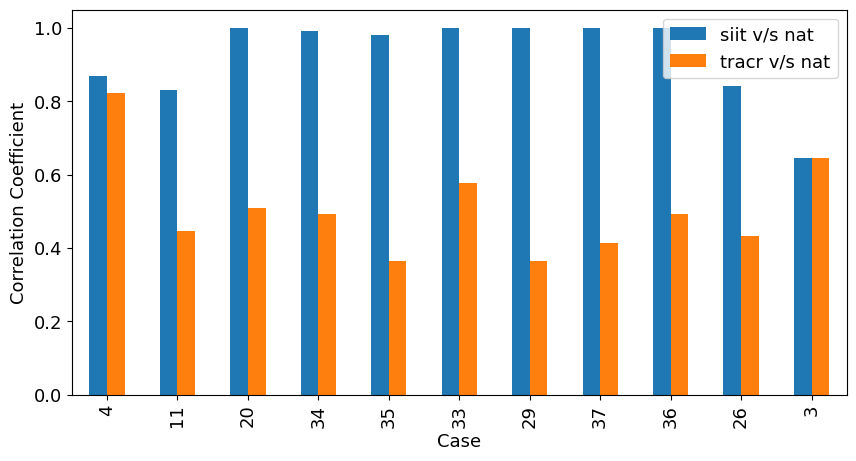

In [47]:
cc_vals.plot.bar(x="run", y=["siit v/s nat", "tracr v/s nat"], figsize=(10, 5))
plt.ylabel("Correlation Coefficient")
plt.xlabel("Case")
plt.savefig("plots/correlation_coefficients.pdf", bbox_inches="tight", dpi=600)

### Proportion of Edges

In [31]:
from utils.get_circuit_discovery_scores import append_row, get_best_weight, bad_runs

def get_acdc_scores(weight):
    # make an empty table with columns: run, threshold, tpr, fpr
    df = pd.DataFrame(columns=["run", "threshold", "node_tpr", "node_fpr", "edge_tpr", "edge_fpr"])

    
    for folder in os.listdir("results"):
        if "acdc" not in folder:
            continue
        run = folder.split("_")[-1]
        if run in bad_runs:
            print(f"Skipping {run}")
            continue
        
        if weight == "best":
            weight = get_best_weight(run)

        weight_folder = os.path.join("results", folder, f"weight_{weight}")
        if not os.path.exists(weight_folder):
            continue
        print(weight_folder)
        for thresholds_folder in os.listdir(weight_folder):
            results_file = os.path.join(weight_folder, thresholds_folder, "result.pkl")
            if not os.path.exists(results_file):
                continue
            threshold = float(thresholds_folder.split("_")[-1])
            result = pickle.load(open(results_file, "rb"))
            positive_nodes = len(result["nodes"]["true_positive"]) + len(result["nodes"]["false_negative"])
            negative_nodes = len(result["nodes"]["true_negative"]) + len(result["nodes"]["false_positive"])
            all_nodes = positive_nodes + negative_nodes
            positive_edges = len(result["edges"]["true_positive"]) + len(result["edges"]["false_negative"])
            negative_edges = len(result["edges"]["true_negative"]) + len(result["edges"]["false_positive"])
            all_edges = positive_edges + negative_edges
            entry = {"run": run, "threshold": threshold, 
                    "node_tpr": result["nodes"]["tpr"],
                    "node_fpr": result["nodes"]["fpr"],
                    "edge_tpr": result["edges"]["tpr"],
                    "edge_fpr": result["edges"]["fpr"],
                    "num_positive_nodes": positive_nodes,
                    "num_negative_nodes": negative_nodes,
                    "num_positive_edges": positive_edges,
                    "num_negative_edges": negative_edges,
                    "num_all_nodes": all_nodes,
                    "proportion_positive_nodes": positive_nodes/all_nodes,
                    "num_all_edges": all_edges,
                    "proportion_positive_edges": positive_edges/all_edges,
            }
            if 'N/A' in entry.values():
                print(f"Skipping {run} {threshold}")
                continue
            entry = pd.Series(entry)
            df = append_row(df, entry)
    return df

In [145]:
siit_result = get_acdc_scores("510")
nat_result = get_acdc_scores("100")
tracr_result = get_acdc_scores("tracr")

results/acdc_35/weight_510
results/acdc_34/weight_510
results/acdc_33/weight_510
Skipping 4
results/acdc_18/weight_510
results/acdc_11/weight_510
Skipping 16
results/acdc_19/weight_510
Skipping 38
results/acdc_37/weight_510
results/acdc_8/weight_510
results/acdc_7/weight_510
Skipping 7 0.0
Skipping 7 0.1
Skipping 7 0.8
Skipping 7 1e-05
Skipping 7 0.025
Skipping 7 100.0
Skipping 7 0.001
Skipping 7 10.0
Skipping 7 50.0
Skipping 7 0.01
Skipping 7 0.0001
Skipping 7 0.2
Skipping 7 0.5
Skipping 7 20.0
Skipping 7 1.0
Skipping 7 0.05
results/acdc_24/weight_510
results/acdc_13/weight_510
results/acdc_14/weight_510
Skipping 14 0.0
Skipping 14 0.1
Skipping 14 0.8
Skipping 14 1e-05
Skipping 14 0.025
Skipping 14 100.0
Skipping 14 0.001
Skipping 14 10.0
Skipping 14 50.0
Skipping 14 0.01
Skipping 14 0.0001
Skipping 14 0.2
Skipping 14 0.5
Skipping 14 20.0
Skipping 14 1.0
Skipping 14 0.05
results/acdc_35/weight_100
results/acdc_34/weight_100
results/acdc_33/weight_100
results/acdc_3/weight_100
Skipping

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


results/acdc_14/weight_100
Skipping 14 0.0
Skipping 14 0.1
Skipping 14 0.8
Skipping 14 1e-05
Skipping 14 0.025
Skipping 14 100.0
Skipping 14 0.001
Skipping 14 10.0
Skipping 14 50.0
Skipping 14 0.01
Skipping 14 0.0001
Skipping 14 0.2
Skipping 14 0.5
Skipping 14 20.0
Skipping 14 1.0
Skipping 14 0.02
Skipping 14 0.05
results/acdc_35/weight_tracr
results/acdc_34/weight_tracr
results/acdc_33/weight_tracr
results/acdc_3/weight_tracr
Skipping 4
results/acdc_18/weight_tracr
results/acdc_11/weight_tracr
Skipping 16
results/acdc_28/weight_tracr
results/acdc_19/weight_tracr
Skipping 19 0.0
Skipping 19 0.1
Skipping 19 0.8
Skipping 19 1e-05
Skipping 19 0.025
Skipping 19 100.0
Skipping 19 0.001
Skipping 19 10.0
Skipping 19 50.0
Skipping 19 0.01
Skipping 19 0.0001
Skipping 19 0.2
Skipping 19 0.5
Skipping 19 20.0
Skipping 19 1.0
Skipping 19 0.05
results/acdc_21/weight_tracr
Skipping 38
results/acdc_36/weight_tracr
results/acdc_37/weight_tracr
results/acdc_8/weight_tracr
Skipping 8 0.0
Skipping 8 0.1
S

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [150]:
unique_runs = siit_result["run"].unique()
siit_proportion_of_positives_li = []
nat_proportion_of_positives_li = []
tracr_proportion_of_positives_li = []
siit_proportion_of_positives = pd.DataFrame(columns=["run", "threshold", "proportion_of_positives"])
nat_proportion_of_positives = pd.DataFrame(columns=["run", "threshold", "proportion_of_positives"])
tracr_proportion_of_positives = pd.DataFrame(columns=["run", "threshold", "proportion_of_positives"])
runs_in_common = []
for run in unique_runs:
    siit_run = siit_result[siit_result["run"] == run]
    nat_run = nat_result[nat_result["run"] == run]
    tracr_run = tracr_result[tracr_result["run"] == run]
    
    common_thresholds = set(siit_run["threshold"].values).intersection(set(tracr_run["threshold"].values)).intersection(set(nat_run["threshold"].values))
    common_thresholds = sorted(list(common_thresholds))
    if common_thresholds == []:
        continue
    siit_positives = []
    tracr_positives = []
    nat_positives = []
    nodes_or_edges_str = "edges"
    for t in common_thresholds:
        siit_positives.append(siit_run[siit_run["threshold"] == t]["proportion_positive_" + nodes_or_edges_str].values[0])
        tracr_positives.append(tracr_run[tracr_run["threshold"] == t]["proportion_positive_" + nodes_or_edges_str].values[0])
        nat_positives.append(nat_run[nat_run["threshold"] == t]["proportion_positive_" + nodes_or_edges_str].values[0])

        
        siit_proportion_of_positives = append_row(siit_proportion_of_positives, pd.Series({"run": run, "threshold": t, "proportion_of_positives": siit_positives[-1]}))
        
    
    runs_in_common.append(run)
    siit_proportion_of_positives_li.append(np.mean(siit_positives))
    nat_proportion_of_positives_li.append(np.mean(nat_positives))
    tracr_proportion_of_positives_li.append(np.mean(tracr_positives))

# make a table of the correlation coefficients
cp_vals = pd.DataFrame({"run": runs_in_common, "siit": siit_proportion_of_positives_li, "nat": nat_proportion_of_positives_li, "tracr": tracr_proportion_of_positives_li})

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/utils/get_circuit_discovery_scores.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [151]:
cp_vals

,run,siit,nat,tracr
0,35,0.018868,0.018868,0.200000
1,34,0.018868,0.018868,0.200000
2,33,0.018868,0.018868,0.200000
3,18,0.018868,0.018868,0.200000
4,11,0.037736,0.037736,0.142857
5,37,0.018868,0.018868,0.200000
6,24,0.037736,0.037736,0.400000
7,13,0.132075,0.132075,0.280000
